In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

14th of April - 17:20 

Gathered 60 seconds of data, 
Individual finger movements, grouped finger movements (pairs) and all finger closing (grasping).

In [2]:
data = pd.read_csv("../data/dataset-full_hand-60s.csv")

In [3]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_x,Palm_y,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,38,269,111,47,101,35,22,23,-13.892977,-24.676735,...,127.042839,113.481201,131.047806,137.758286,128.349930,116.208405,119.820808,124.822617,118.878288,108.890717
1,39,356,120,62,146,39,24,25,-13.852209,-24.586508,...,127.192207,113.670609,131.218033,137.775970,128.412369,116.329781,120.034424,124.847496,118.893349,108.933693
2,35,434,128,72,185,37,25,25,-13.813737,-24.502161,...,127.295685,113.810234,131.367523,137.758301,128.447525,116.435005,120.223473,124.852211,118.890427,108.961174
3,32,476,137,74,205,39,24,27,-13.736932,-24.342701,...,127.465889,114.056679,131.638794,137.674881,128.473282,116.613785,120.565979,124.868614,118.919731,109.070923
4,33,490,140,79,217,38,25,27,-13.693318,-24.266806,...,127.565887,114.191597,131.785568,137.642868,128.489487,116.704178,120.750320,124.913513,118.978653,109.172569


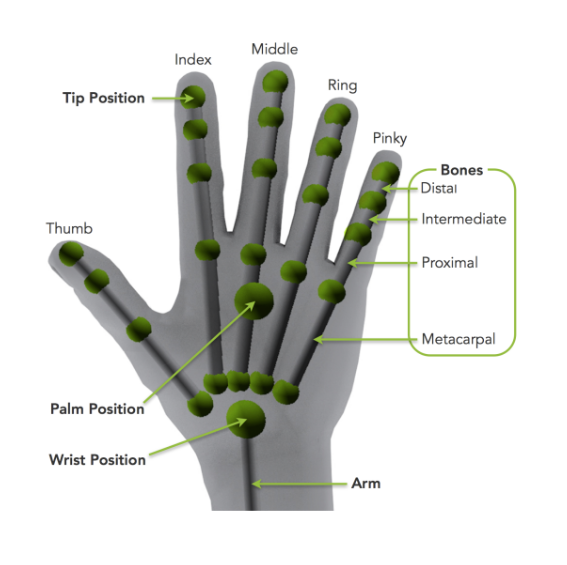

```
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger.This is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
```

In [4]:
leap_bone_columns = [
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]
len(leap_bone_columns)

66

In [6]:
data.shape

(2990, 74)

## Plotting an example point. 

In [7]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_x', 'Palm_y', 'Palm_z',
       'Wrist_x', 'Wrist_y', 'Wrist_z', 'Thumb_MCP_x', 'Thumb_MCP_y',
       'Thumb_MCP_z', 'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
       'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z', 'Thumb_TIP_x',
       'Thumb_TIP_y', 'Thumb_TIP_z', 'Index_MCP_x', 'Index_MCP_y',
       'Index_MCP_z', 'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
       'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z', 'Index_TIP_x',
       'Index_TIP_y', 'Index_TIP_z', 'Middle_MCP_x', 'Middle_MCP_y',
       'Middle_MCP_z', 'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
       'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z', 'Middle_TIP_x',
       'Middle_TIP_y', 'Middle_TIP_z', 'Ring_MCP_x', 'Ring_MCP_y',
       'Ring_MCP_z', 'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z', 'Ring_DIP_x',
       'Ring_DIP_y', 'Ring_DIP_z', 'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
       'Pinky_M

In [8]:
channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5','Channel_6', 'Channel_7', 'Channel_8']
bone_df = data.drop(channel_cols, 1)

examp_frame = bone_df.iloc[10].values

# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
examp_frame = examp_frame.reshape((3, NUM_POINTS//3))

### Plotting points of the hand

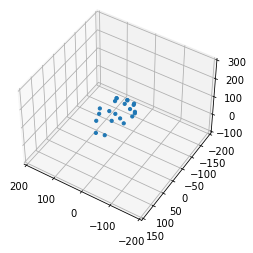

In [9]:
def plot_points(points, scatter):
    scatter.set_offsets(points[:2].T)
    scatter.set_3d_properties(points[2], zdir='z')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

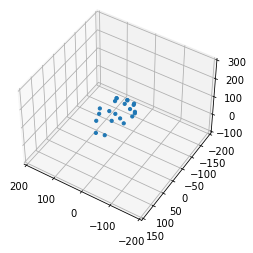

In [10]:
pred = data.iloc[10].drop(channel_cols).values

# Five finger, 4 joints + palm,wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3

# Change the shape by adding a new point on
pred_points = pred.reshape((3, (NUM_POINTS)//3))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

## Plotting the whole hand

In [11]:
# Plotting the whole hand
def plot_bone_lines(points, ax):
    '''
    Plot the lines for the hand based on a full hand model.
    (22 points, 66 vars)
    '''
    mcps = []

    # Wrist
    wrist = points[:,1]

    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = points[:,n+0]
        pip = points[:,n+1]
        dip = points[:,n+2]
        tip = points[:,n+3]

        # Connect the lowest joint to the middle joint
        bot = plt3d.art3d.Line3D([mcp[0], pip[0]], [mcp[1], pip[1]], [mcp[2], pip[2]])
        ax.add_line(bot)

        # Connect the middle joint to the top joint
        mid = plt3d.art3d.Line3D([pip[0], dip[0]], [pip[1], dip[1]], [pip[2], dip[2]])
        ax.add_line(mid)

        # Connect the top joint to the tip of the finger
        top = plt3d.art3d.Line3D([dip[0], tip[0]], [dip[1], tip[1]], [dip[2], tip[2]])
        ax.add_line(top)

        # Connect each of the fingers together
        mcps.append(mcp)
    for mcp in range(0,4):
        line = plt3d.art3d.Line3D([mcps[mcp][0], mcps[mcp+1][0]],
                                  [mcps[mcp][1], mcps[mcp+1][1]],
                                  [mcps[mcp][2], mcps[mcp+1][2]])
        ax.add_line(line)
    # Create the right side of the hand joining the pinkie mcp to the "wrist"
    line = plt3d.art3d.Line3D([wrist[0], mcps[4][0]],
                                  [wrist[1], mcps[3+1][1]],
                                  [wrist[2], mcps[3+1][2]])
    ax.add_line(line)

    # Generate the "Wrist", note right side is not right.
    line = plt3d.art3d.Line3D([wrist[0], mcps[0][0]],
                                  [wrist[1], mcps[0][1]],
                                  [wrist[2], mcps[0][2]])
    ax.add_line(line)

    # Connext the left hand side of the index finger to the thumb.
    thumb_mcp = points[:,1+2]
    pinky_mcp = points[:,4+2]
    line = plt3d.art3d.Line3D([thumb_mcp[0], pinky_mcp[0]],
                                  [thumb_mcp[1], pinky_mcp[1]],
                                  [thumb_mcp[2], pinky_mcp[2]])
    ax.add_line(line)

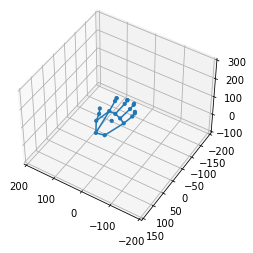

In [12]:
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)
plot_bone_lines(examp_frame,ax)

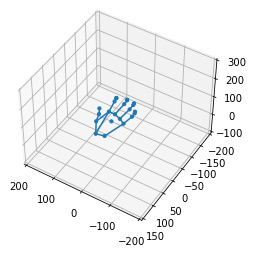

In [13]:
def plot_row_bones(row):
    channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']
    try:
        bone_df = row.drop(channel_cols)
    except:
        bone_df = row
    
    # Five finger, 4 joints + palm, wrist. x,y,z
    NUM_POINTS = (5 * 4 + 2) * 3
    examp_frame = bone_df.values.reshape((3, NUM_POINTS//3))
    
    # Plot setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
    ax.view_init(elev=45., azim=122)

    points_ = np.zeros((3, NUM_POINTS))
    sizes = [10]*(NUM_POINTS//3)
    sizes[0] = 30
    patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

    # Plot the hand
    plot_points(examp_frame, patches)
    plot_bone_lines(examp_frame,ax)
    
plot_row_bones(data.iloc[15])

In [15]:
df = data.copy(deep=True)

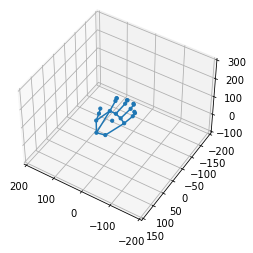

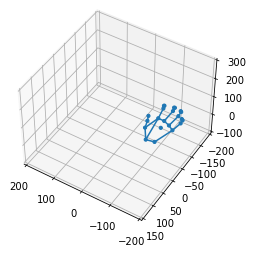

In [16]:
examp = df.iloc[1]
plot_row_bones(examp)

examp = examp - 100
plot_row_bones(examp)

In [17]:
pred_points

array([[-13.15761757, -23.5734005 ,   3.82898355,  29.81753922,
         40.53422165,  51.42090225,   8.70367813,  16.12286186,
         23.09753227,  28.43218803, -10.70016861, -12.19203758,
         -6.36095142,   0.1681447 , -29.61732292, -35.76863098,
        -32.15044022, -26.03757477, -45.14091492, -52.77114868,
        -50.12335587, -43.2835083 ],
       [ 28.1745224 ,  75.67681885,  80.01869965,  43.02335739,
         14.60098648,  -3.54910755,   9.32829189, -28.85168457,
        -46.38667679, -53.59666061,   7.12805176, -36.50096512,
        -58.23817825, -66.88768005,  10.35493755, -29.35852242,
        -52.55673981, -63.58413696,  14.6153326 , -16.32164001,
        -32.82975006, -43.15631104],
       [130.71650696, 121.223526  , 119.72621155, 119.57266998,
        114.00765991, 112.83495331, 144.77609253, 145.95654297,
        134.86039734, 122.24976349, 140.26025391, 140.64813232,
        128.12460327, 115.00022125, 132.66523743, 137.42025757,
        128.57281494, 117.2855

In [18]:
print("Correlation Matrix")
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Correlation Matrix

Top Absolute Correlations
Middle_DIP_x  Middle_TIP_y    0.997675
Middle_MCP_z  Middle_DIP_x    0.997437
Index_TIP_y   Middle_MCP_z    0.997168
Index_PIP_y   Middle_MCP_z    0.996880
Index_DIP_y   Index_DIP_z     0.996679
Index_PIP_y   Middle_DIP_x    0.996281
              Index_PIP_z     0.994845
Middle_TIP_y  Middle_TIP_z    0.994426
Index_PIP_y   Index_TIP_y     0.994176
              Middle_TIP_y    0.993547
dtype: float64


# Making a full hand baseline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

X = df[x_cols]
y = df.drop(x_cols,1)

train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

# Making our benchmark model
# Just predict the mean average number of bikes. 
y_train_mean = train_y.mean()

train_preds = np.ones(train_y.shape) * y_train_mean
preds = np.ones(test_y.shape) * y_train_mean

rmse = np.sqrt(mean_squared_error(train_y, train_preds))
print("Train RMSE: %f" % (rmse))

mae = mean_absolute_error(train_y, train_preds)
print("Train MAE: %f" % (mae))

rmse = np.sqrt(mean_squared_error(test_y, preds))
print("Test RMSE: %f" % (rmse))

mae = mean_absolute_error(test_y, preds)
print("Test MAE: %f" % (mae))

r2_score(test_y, preds)

Train RMSE: 78.911608
Train MAE: 70.500064
Test RMSE: 78.857916
Test MAE: 70.479711


-112.7129210623068

In [20]:
X

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,38,269,111,47,101,35,22,23
1,39,356,120,62,146,39,24,25
2,35,434,128,72,185,37,25,25
3,32,476,137,74,205,39,24,27
4,33,490,140,79,217,38,25,27
...,...,...,...,...,...,...,...,...
2985,32,100,99,65,46,39,30,31
2986,35,103,92,62,48,40,34,32
2987,32,102,101,65,46,34,32,28
2988,34,100,105,60,41,32,31,28


In [21]:
y

,Palm_x,Palm_y,Palm_z,Wrist_x,Wrist_y,Wrist_z,Thumb_MCP_x,Thumb_MCP_y,Thumb_MCP_z,Thumb_PIP_x,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,-13.892977,-24.676735,2.695463,30.128792,41.339161,50.213497,7.797550,15.613358,23.204357,28.987444,...,127.042839,113.481201,131.047806,137.758286,128.349930,116.208405,119.820808,124.822617,118.878288,108.890717
1,-13.852209,-24.586508,2.791382,30.051067,41.162502,50.331444,7.853301,15.610731,23.138130,28.871532,...,127.192207,113.670609,131.218033,137.775970,128.412369,116.329781,120.034424,124.847496,118.893349,108.933693
2,-13.813737,-24.502161,2.880671,29.995056,41.024296,50.397797,7.904698,15.610363,23.079208,28.767342,...,127.295685,113.810234,131.367523,137.758301,128.447525,116.435005,120.223473,124.852211,118.890427,108.961174
3,-13.736932,-24.342701,3.048274,29.894197,40.790188,50.548004,8.003746,15.620891,22.981880,28.590462,...,127.465889,114.056679,131.638794,137.674881,128.473282,116.613785,120.565979,124.868614,118.919731,109.070923
4,-13.693318,-24.266806,3.127000,29.841534,40.694660,50.651516,8.063121,15.639925,22.944366,28.512745,...,127.565887,114.191597,131.785568,137.642868,128.489487,116.704178,120.750320,124.913513,118.978653,109.172569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,-24.055279,-27.842108,1.319661,22.705994,36.829483,52.915775,-4.508302,7.963452,15.548510,21.097004,...,139.525818,131.935028,148.539429,138.534210,128.043701,119.253395,135.481659,125.091270,117.124619,109.012543
2986,-23.996096,-27.568869,1.597646,22.632555,36.636108,52.585648,-4.627016,7.885043,15.536050,21.146513,...,140.003448,132.495636,148.303314,138.943863,128.992691,120.594398,135.143875,124.182663,115.836533,107.396141
2987,-23.924204,-27.282734,1.886638,22.566021,36.419434,52.238350,-4.748811,7.816723,15.545524,21.228825,...,140.291138,132.867996,147.975189,138.908966,129.214767,121.007652,134.699478,123.325951,114.712585,106.048393
2988,-23.840736,-26.927071,2.241923,22.434608,36.143452,51.812302,-4.928934,7.710777,15.546399,21.330553,...,140.968857,133.760559,147.497849,138.724228,129.341705,121.383514,134.060394,122.136932,113.180992,104.242241


# Making a baseline Neural Network

In [26]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8']

X = df[x_cols]
y = df.drop(x_cols,1)

rel_hand_scaler = StandardScaler()
emg_scaler = StandardScaler()

ny = rel_hand_scaler.fit_transform(y)
nX = emg_scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(nX, ny, test_size=0.25)

In [31]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8,input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(66,activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='Adam')
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 66)                16962     
Total params: 85,130
Trainable params: 85,130
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = NN_model.fit(train_X, train_y, epochs=200, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/200
71/71 [==============================] - 0s 2ms/step - loss: 0.9585 - val_loss: 0.8937
Epoch 2/200
71/71 [==============================] - 0s 1ms/step - loss: 0.8720 - val_loss: 0.8435
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.8340 - val_loss: 0.8157
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.8128 - val_loss: 0.8070
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 0.7989 - val_loss: 0.7902
Epoch 6/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7906 - val_loss: 0.7817
Epoch 7/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7769 - val_loss: 0.7683
Epoch 8/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7685 - val_loss: 0.7623
Epoch 9/200
71/71 [==============================] - 0s 2ms/step - loss: 0.7583 - val_loss: 0.7551
Epoch 10/200
71/71 [==============================] - 0s 1ms/step - loss: 0.7517 - val_loss: 0.7493
Epoch 11/

71/71 [==============================] - 0s 1ms/step - loss: 0.4983 - val_loss: 0.7092
Epoch 84/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4887 - val_loss: 0.7115
Epoch 85/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4922 - val_loss: 0.7155
Epoch 86/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4885 - val_loss: 0.7115
Epoch 87/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4901 - val_loss: 0.7162
Epoch 88/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4812 - val_loss: 0.7153
Epoch 89/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4805 - val_loss: 0.7177
Epoch 90/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4779 - val_loss: 0.7140
Epoch 91/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4769 - val_loss: 0.7119
Epoch 92/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4699 - val_loss: 0.7325
Epoch 93/200


71/71 [==============================] - 0s 1ms/step - loss: 0.3436 - val_loss: 0.8420
Epoch 165/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3494 - val_loss: 0.7969
Epoch 166/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3333 - val_loss: 0.7936
Epoch 167/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3316 - val_loss: 0.7872
Epoch 168/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3394 - val_loss: 0.8051
Epoch 169/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3325 - val_loss: 0.7876
Epoch 170/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3282 - val_loss: 0.7867
Epoch 171/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3348 - val_loss: 0.7988
Epoch 172/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3278 - val_loss: 0.8102
Epoch 173/200
71/71 [==============================] - 0s 1ms/step - loss: 0.3328 - val_loss: 0.8101
Epoc

In [33]:
# Evaluate the model on the test data
mse = NN_model.evaluate(test_X, test_y)
mse

24/24 [==============================] - 0s 847us/step - loss: 0.8252


0.8252052664756775

Note that using wrist as the rel_point gives 0.10, which was a lower loss than using the palm

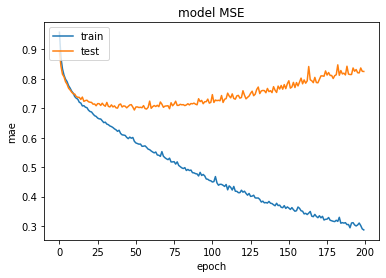

In [34]:
# summarize history for loss
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
prediction = NN_model.predict(train_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(train_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[ 0.21084909  0.04233203  0.0813676  ...  0.6386569   0.6612916
   0.6797137 ]
 [ 0.02259617 -0.00435617  0.06326809 ... -0.27693143 -0.19289106
  -0.11359274]
 [-0.4923668  -0.6025747  -0.56016606 ...  0.69796133  0.5957173
   0.5348849 ]
 ...
 [ 0.4021055   0.37133777  0.32646492 ... -0.9156615  -0.7515173
  -0.7109786 ]
 [-0.33804795 -0.41883004 -0.36270288 ...  0.84382844  0.93098706
   0.9903548 ]
 [ 0.19854634  0.02206201  0.06256523 ...  0.42637038  0.5056603
   0.5325424 ]]
MSE:  31.91529199174255
RMSE:  5.649362087151305
MAE:  3.685893601755729


In [36]:
prediction = NN_model.predict(test_X) # scaled inputs here
print(prediction)

# Scaling back the prediction
preds = rel_hand_scaler.inverse_transform(prediction)
# Scaling back the goals
goal = rel_hand_scaler.inverse_transform(test_y)

MSE = mean_squared_error(goal, preds)  # first 2 steps, combined
print("MSE: ", MSE)
print("RMSE: ", np.sqrt(MSE))  # 3rd step
MAE = mean_absolute_error(goal, preds)
print("MAE: ", MAE)

[[-0.9497484  -0.16210485 -0.04360638 ... -0.36245894 -0.6274576
  -0.79499334]
 [-1.6186602  -0.7745637  -0.6308856  ...  0.45552576  0.28723007
   0.200979  ]
 [ 0.8665576   0.50476176  0.29679406 ...  0.4776352   0.8576931
   0.9749676 ]
 ...
 [-0.8424751  -0.71480143 -0.6408454  ...  1.1048406   1.0887734
   1.0984588 ]
 [-0.5181479  -0.11081836 -0.10237598 ...  0.99753964  0.26975858
  -0.26716518]
 [-0.6956139  -0.58568525 -0.5443807  ...  0.7910838   0.8571788
   0.8360663 ]]
MSE:  92.21415081501813
RMSE:  9.602819940778756
MAE:  6.572253471799493


# Plot the predicted vs ground truth

### Save the model and the scalers

In [37]:
import joblib

model_name = "NNNonRel-60secs-FULL-StanScaled"

NN_model.save(f"../models/{model_name}.h5")
# Save hand scaler to file.
# Scales the output of the network, the relative position of the hand, min_max
joblib.dump(rel_hand_scaler, f'../models/{model_name}-Hand.gz')

# Scales the input to the network, the emg data. 
joblib.dump(emg_scaler, f'../models/{model_name}-EMG.gz')

['../models/NNNonRel-60secs-FULL-StanScaled-EMG.gz']

In [44]:
# Making a prediction in the prediction script.
from keras.models import load_model
model = load_model(f"../models/{model_name}.h5")

input_scaler = joblib.load(f'../models/{model_name}-EMG.gz')
output_scaler = joblib.load(f'../models/{model_name}-Hand.gz')

# Get some input data
semg_input = np.array([[ 31, 140, 140,  83,  42,  30,  22,  21]])
# Scale the input
scaled_input = input_scaler.transform(semg_input)
# Get a prediction
pred = model.predict(scaled_input)
# Scale it back to a value
scaled_pred = output_scaler.inverse_transform(pred)
scaled_pred
# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
pred_points = scaled_pred.reshape((3, NUM_POINTS//3))

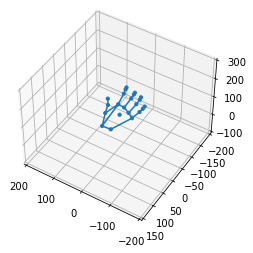

In [45]:
# Plotting pred points
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(pred_points, patches)
plot_bone_lines(pred_points, ax)